# COGS 108 - EDA Checkpoint

# Names

- Gideon Chan
- Nancy Jiang
- Elliot Kim
- Harrison Nguyen
- Jose Mateo

<a id='research_question'></a>
# Research Question

How well can we model the gas prices of California and the United States? How do the models compare to each other?


# Setup

In [2]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

Those two datasets are in xlw format, and we need to read each dataset into a dataframe with only the spreadsheet of weekly gasoline prices. Then we match those two dataset with exact same weekly date, so it's fair when we compare the two models after we train them. After we merge the datasets, we extract year and month from the original date, so we can have a better understanding of the data.

In [52]:
df_ca = pd.DataFrame(pd.read_excel("dataset/CA.xls.xlw", 
                                   engine = "xlrd",sheet_name='Data 1'))
df_us = pd.DataFrame(pd.read_excel("dataset/US.xls.xlw",
                                   engine = "xlrd",sheet_name='Data 1'))
df_us_inf = pd.read_csv("dataset/US_Inflation.csv")

In [53]:
df_us.columns=['date','gasoline price']
df_us = df_us.iloc[2:, :].reset_index(drop = True)
df_us 

,date,gasoline price
0,1993-04-05 00:00:00,1.068
1,1993-04-12 00:00:00,1.079
2,1993-04-19 00:00:00,1.079
3,1993-04-26 00:00:00,1.086
4,1993-05-03 00:00:00,1.086
...,...,...
1556,2023-01-30 00:00:00,3.594
1557,2023-02-06 00:00:00,3.552
1558,2023-02-13 00:00:00,3.502
1559,2023-02-20 00:00:00,3.494


In [54]:
df_ca.columns=['date','gasoline price']
df_ca = df_ca.iloc[2:, :].reset_index(drop = True)
df_ca 

,date,gasoline price
0,2000-05-22 00:00:00,1.679
1,2000-05-29 00:00:00,1.673
2,2000-06-05 00:00:00,1.661
3,2000-06-12 00:00:00,1.662
4,2000-06-19 00:00:00,1.664
...,...,...
1184,2023-01-30 00:00:00,4.462
1185,2023-02-06 00:00:00,4.514
1186,2023-02-13 00:00:00,4.535
1187,2023-02-20 00:00:00,4.626


In [55]:
df = pd.merge(df_us, df_ca, on="date")
df.columns = ['date','price_us','price_ca']
df

,date,price_us,price_ca
0,2000-05-22 00:00:00,1.566,1.679
1,2000-05-29 00:00:00,1.579,1.673
2,2000-06-05 00:00:00,1.599,1.661
3,2000-06-12 00:00:00,1.664,1.662
4,2000-06-19 00:00:00,1.711,1.664
...,...,...,...
1184,2023-01-30 00:00:00,3.594,4.462
1185,2023-02-06 00:00:00,3.552,4.514
1186,2023-02-13 00:00:00,3.502,4.535
1187,2023-02-20 00:00:00,3.494,4.626


In [56]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

In [57]:
df

,date,price_us,price_ca,year,month
0,2000-05-22 00:00:00,1.566,1.679,2000,5
1,2000-05-29 00:00:00,1.579,1.673,2000,5
2,2000-06-05 00:00:00,1.599,1.661,2000,6
3,2000-06-12 00:00:00,1.664,1.662,2000,6
4,2000-06-19 00:00:00,1.711,1.664,2000,6
...,...,...,...,...,...
1184,2023-01-30 00:00:00,3.594,4.462,2023,1
1185,2023-02-06 00:00:00,3.552,4.514,2023,2
1186,2023-02-13 00:00:00,3.502,4.535,2023,2
1187,2023-02-20 00:00:00,3.494,4.626,2023,2


In [58]:
df_us_inf = df_us_inf.drop("Series ID",axis = 1)

In [59]:
df_us_inf = df_us_inf.drop(df_us_inf[(df_us_inf["Period"] == "S01") | (df_us_inf["Period"] == "S02")].index)
df_us_inf["Period"].unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12'], dtype=object)

In [60]:
df_us_inf
df_us_inf.loc[df_us_inf["Period"] == "M01", "Period"] = 1
df_us_inf.loc[df_us_inf["Period"] == "M02", "Period"] = 2
df_us_inf.loc[df_us_inf["Period"] == "M03", "Period"] = 3
df_us_inf.loc[df_us_inf["Period"] == "M04", "Period"] = 4
df_us_inf.loc[df_us_inf["Period"] == "M05", "Period"] = 5
df_us_inf.loc[df_us_inf["Period"] == "M06", "Period"] = 6
df_us_inf.loc[df_us_inf["Period"] == "M07", "Period"] = 7
df_us_inf.loc[df_us_inf["Period"] == "M08", "Period"] = 8
df_us_inf.loc[df_us_inf["Period"] == "M09", "Period"] = 9
df_us_inf.loc[df_us_inf["Period"] == "M10", "Period"] = 10
df_us_inf.loc[df_us_inf["Period"] == "M11", "Period"] = 11
df_us_inf.loc[df_us_inf["Period"] == "M12", "Period"] = 12

In [64]:
df_us_inf.columns = ["year","month","inflation"]
df_us_inf

,year,month,inflation
0,2000,1,2.0
1,2000,2,2.2
2,2000,3,2.4
3,2000,4,2.3
4,2000,5,2.4
...,...,...,...
317,2022,10,6.3
318,2022,11,6.0
319,2022,12,5.7
322,2023,1,5.6


In [112]:
df["inflation"] = 0
for row in df.itertuples():
    temp_year = row.year
    temp_month = row.month
    temp_inf = df_us_inf.loc[(df_us_inf["year"] == temp_year) & (df_us_inf["month"] == temp_month)]["inflation"]
    df["inflation"].at[row.Index] = temp_inf
df

,date,price_us,price_ca,year,month,inflation
0,2000-05-22 00:00:00,1.566,1.679,2000,5,2.4
1,2000-05-29 00:00:00,1.579,1.673,2000,5,2.4
2,2000-06-05 00:00:00,1.599,1.661,2000,6,2.5
3,2000-06-12 00:00:00,1.664,1.662,2000,6,2.5
4,2000-06-19 00:00:00,1.711,1.664,2000,6,2.5
...,...,...,...,...,...,...
1184,2023-01-30 00:00:00,3.594,4.462,2023,1,5.6
1185,2023-02-06 00:00:00,3.552,4.514,2023,2,5.5
1186,2023-02-13 00:00:00,3.502,4.535,2023,2,5.5
1187,2023-02-20 00:00:00,3.494,4.626,2023,2,5.5


# Data Analysis & Results (EDA)

### EDA: Analysis of Price Trend Lines

Since our research question is about modeling the gas prices of the US and of CA and comparing those prices, we can first create a simple line chart to show the gas prices of the US and CA over time. 

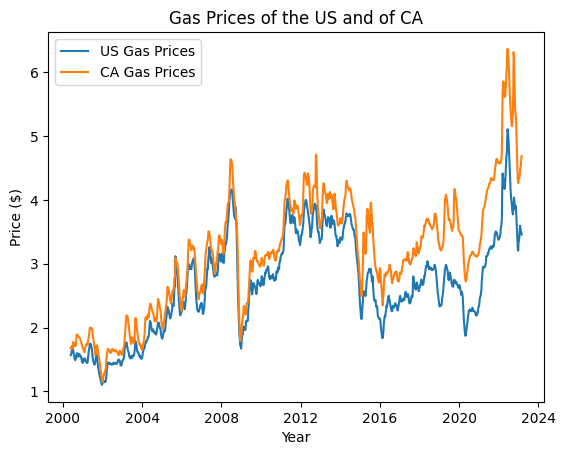

In [29]:
#create seaborn lineplots for the US gas prices and the CA gas prices
sns.lineplot(data=df,x="date",y="price_us",label="US Gas Prices")
sns.lineplot(data=df,x="date",y="price_ca",label="CA Gas Prices")

#set title of the plot and include legend
plt.title("Gas Prices of the US and of CA")
plt.legend()

#change x and y axis labels
plt.xlabel("Year")
plt.ylabel("Price ($)")

#show plot
plt.show()

From the line chart, we can see that prices have definitely increased over the past 20 years. There have been a few notable spikes and drops in the gas prices, but it is safe to say that there is an upward trend in the prices. There is a strong correlation between the prices of California and of the US. However, we can see that there has been a separation between the prices since the beginning of the dataset, and it seems that the separation is increasing. We can take a closer look at that. 

### EDA: Analysis of Difference in Gas Prices Between California and the US

To analyze how the difference in gas prices between California and the US is increasing, we can calculate the difference at each datapoint and then plot a line chart to see if there indeed is a increase.

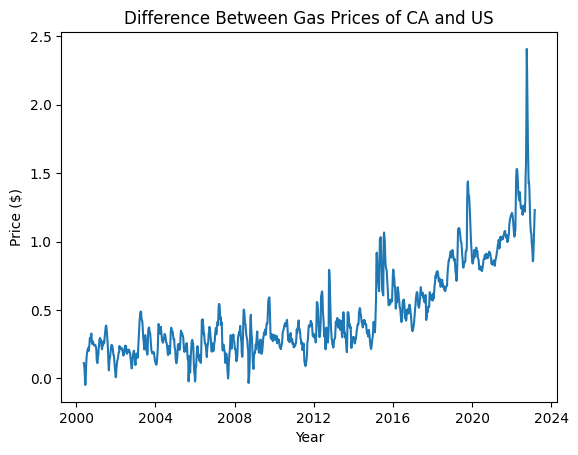

In [35]:
#get difference between CA gas prices and US gas prices
diff = df["price_ca"] - df["price_us"]
df2 = {'year': df['date'],
       'diff': diff}

sns.lineplot(data=df2,x='year',y='diff')

#set title of the plot and include legend
plt.title("Difference Between Gas Prices of CA and US")

#change x and y axis labels
plt.xlabel("Year")
plt.ylabel("Price ($)")

#show plot
plt.show()

As we can see from the plotted line chart, there is data that suggests that California's gas prices are increasing more than that of the US' gas prices. Something interesting to note is that the line chart displays a line that looks similar to that of exponential growth. However, it cannot be certain that there will be an exponential growth in the difference between California's gas prices and the US' gas prices by simply looking at this line chart since the part with exponential growth is of the most recent years. 

### EDA: Analysis of US Inflation from 2000 - 2023

To get a sense of the prices in the U.S., we plot the inflation of the U.S. through out the years.

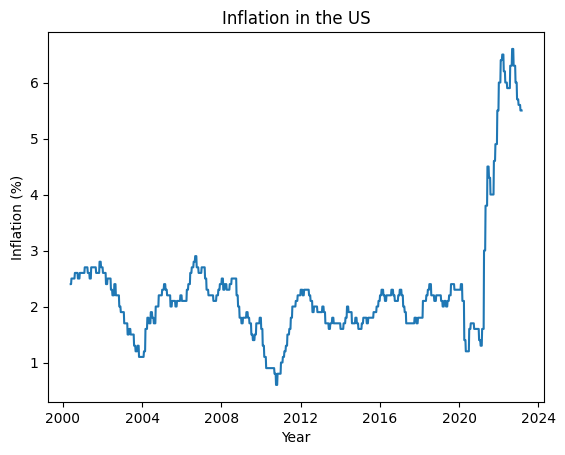

In [111]:
sns.lineplot(data=df,x="date",y="inflation")

#set title of the plot and include legend
plt.title("Inflation in the US")

#change x and y axis labels
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.show()

When analyzing the graph of the inflation in the U.S. and comparing it to the price of gas in the U.S., we can see that the gas prices of both the U.S. and California spikes in price similar to inflation. Similar to above, this graph shows that there is a line that has some exponential growth; it is very appearant in the past few years. We can see that there is correlation between gas prices and inflation when the graph spikes in notable years such as 2008, 2012 and 2021.